In [1]:
# Import libraries (delete ones we don't use later)
import csv
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as st
import numpy as np
from alpha_api_key import api_key

In [2]:
# Create our stock csv files by pulling from Alpha Advantage API
ticker = ["ABBV", "BMY", "CTLT", "LLY", "JNJ", "MRK", "OGN", "PFE", "VTRS", "ZTS" ]

for i in ticker:
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=" + i + \
    "&apikey=" + api_key + "&datatype=csv"
    print(url)

https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=ABBV&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=BMY&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=CTLT&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=LLY&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=JNJ&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=MRK&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=OGN&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=PFE&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=VTRS&apikey=QJ3L29WRI4F95OII&datatype=cs

In [3]:
# Import csv files and merge into one data frame
abbv_stock = "csv_files/monthly_ABBV.csv"
bmy_stock = "csv_files/monthly_BMY.csv"
ctlt_stock = "csv_files/monthly_CTLT.csv"
lly_stock = "csv_files/monthly_LLY.csv"
jnj_stock = "csv_files/monthly_JNJ.csv"
mrk_stock = "csv_files/monthly_MRK.csv"
ogn_stock = "csv_files/monthly_OGN.csv"
pfe_stock = "csv_files/monthly_PFE.csv"
vtrs_stock = "csv_files/monthly_VTRS.csv"
zts_stock = "csv_files/monthly_ZTS.csv"

abbv_df = pd.read_csv(abbv_stock).sort_values(by=['timestamp']).reset_index(drop=True)
bmy_df = pd.read_csv(bmy_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ctlt_df = pd.read_csv(ctlt_stock).sort_values(by=['timestamp']).reset_index(drop=True)
lly_df = pd.read_csv(lly_stock).sort_values(by=['timestamp']).reset_index(drop=True)
jnj_df = pd.read_csv(jnj_stock).sort_values(by=['timestamp']).reset_index(drop=True)
mrk_df = pd.read_csv(mrk_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ogn_df = pd.read_csv(ogn_stock).sort_values(by=['timestamp']).reset_index(drop=True)
pfe_df = pd.read_csv(pfe_stock).sort_values(by=['timestamp']).reset_index(drop=True)
vtrs_df = pd.read_csv(vtrs_stock).sort_values(by=['timestamp']).reset_index(drop=True)
zts_df = pd.read_csv(zts_stock).sort_values(by=['timestamp']).reset_index(drop=True)

merge_df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(\
            abbv_df, bmy_df, how='outer'), ctlt_df, how='outer'), lly_df, how='outer'), \
            jnj_df, how='outer'), mrk_df, how='outer'), ogn_df, how='outer'), \
            pfe_df, how='outer'), vtrs_df, how='outer'), zts_df, how='outer')

# Format timestamp column so they are all the same
merge_df['timestamp'] = pd.to_datetime(merge_df['timestamp'], format='mixed')

# Save merged data frame to new csv
merge_df.to_csv('csv_files/merge_stock.csv', index=False)

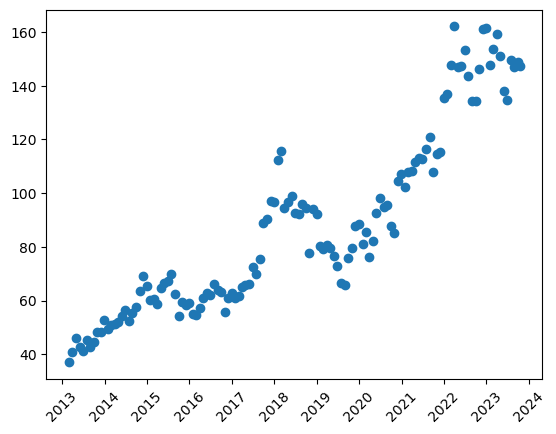

In [9]:
abbv_df = merge_df.loc[merge_df['ticker'] == 'ABBV']
x = abbv_df['timestamp']
y = abbv_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y,)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

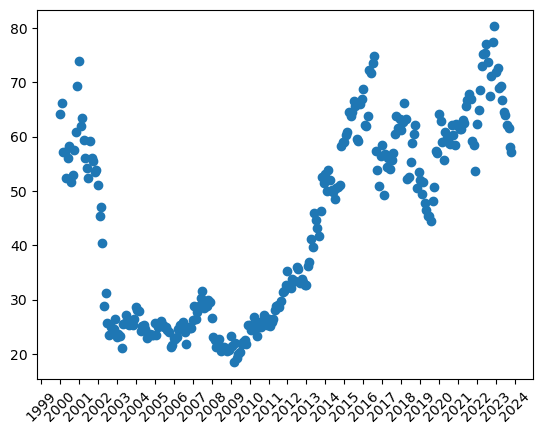

In [13]:
bmy_df = merge_df.loc[merge_df['ticker'] == 'BMY']
x = bmy_df['timestamp']
y = bmy_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

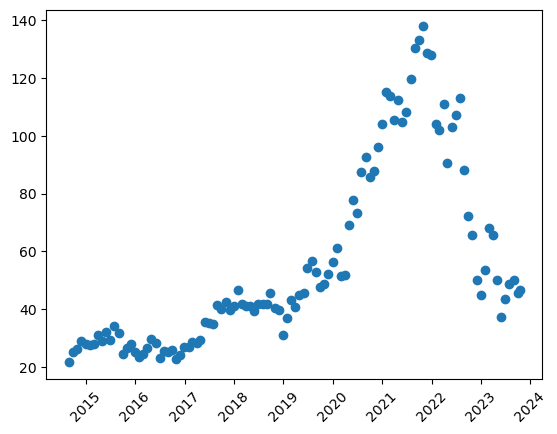

In [14]:
ctlt_df = merge_df.loc[merge_df['ticker'] == 'CTLT']
x = ctlt_df['timestamp']
y = ctlt_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

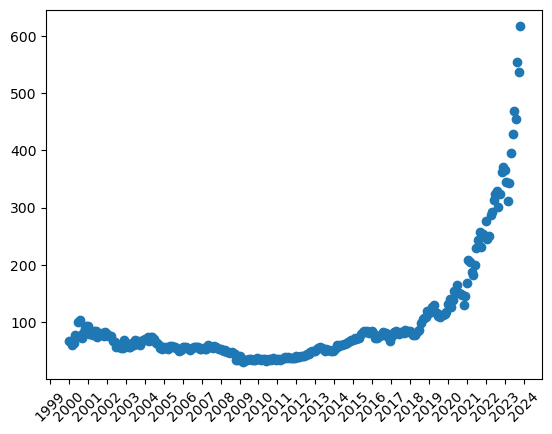

In [19]:
#lly_df['timestamp'] = pd.to_datetime(lly_df['timestamp'], format='mixed')
lly_df = merge_df.loc[merge_df['ticker'] == 'LLY']
x = lly_df['timestamp']
y = lly_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y,)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())